# Fraud Detection Project

## Objective
The objective of this project is to analyze transaction data and build a machine learning model to identify fraudulent transactions.


In [2]:
import pandas as pd

df = pd.read_csv("Fraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape


(6362620, 11)

In [4]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Data Understanding

- The dataset contains millions of transaction records with multiple numerical and categorical features.
- The target variable is `isFraud`, where 1 indicates a fraudulent transaction and 0 indicates a normal transaction.
- Initial inspection shows the structure and data types of the dataset.


In [7]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Missing Values Check

No missing values were observed in the dataset. This indicates that the data is complete and does not require imputation.


In [9]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df['isFraud'].value_counts(normalize=True)


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

## Class Imbalance

The dataset is highly imbalanced, with fraudulent transactions forming a very small fraction of total transactions.  
This imbalance makes accuracy an unreliable evaluation metric, and recall becomes more important for fraud detection.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


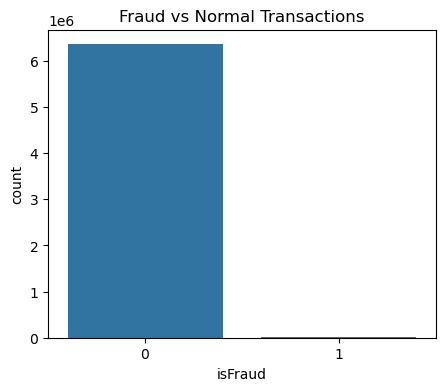

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()


## Fraud vs Normal Transactions

The plot clearly shows that fraudulent transactions are significantly fewer than normal transactions, confirming the severe class imbalance in the dataset.


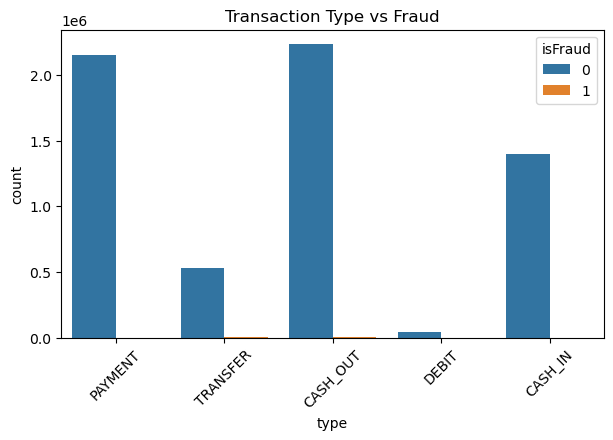

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title("Transaction Type vs Fraud")
plt.xticks(rotation=45)
plt.show()


## Transaction Type Analysis

Certain transaction types show a higher concentration of fraudulent activities, indicating that transaction type is an important feature for fraud detection.


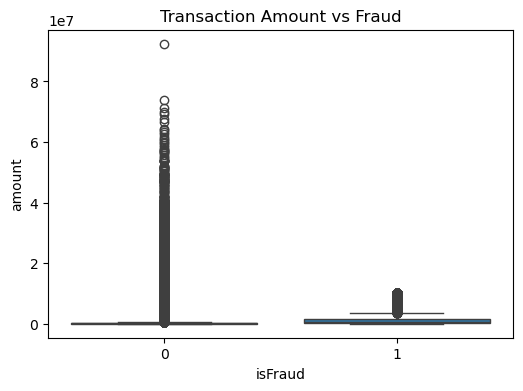

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()


## Transaction Amount Analysis

Fraudulent transactions generally involve higher transaction amounts compared to normal transactions.  
This makes the transaction amount a strong indicator for fraud detection.


In [19]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']


In [20]:
X.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [21]:
y.value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

## Feature Selection

Identifier columns such as `nameOrig` and `nameDest` were removed because they do not contribute to fraud prediction.  
The target variable for this problem is `isFraud`.


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Train-Test Split

The dataset was split into training and testing sets using an 80-20 ratio.  
Stratification was applied to preserve the class imbalance in both sets.


In [25]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(class_weight='balanced', max_iter=1000)
# lr.fit(X_train, y_train)


In [26]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']


In [27]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)


In [28]:
X.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [30]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(
#     class_weight='balanced',
#     max_iter=500,
#     solver='saga',
#     n_jobs=-1
# )
# lr.fit(X_train, y_train)



⚠️ Encoding was performed before train-test split to ensure that both training and testing sets have identical feature structure and contain only numerical values.


In [32]:
# lr


Due to the large size of the dataset, Logistic Regression training was computationally expensive.
Hence, it is treated as a baseline model, and the primary focus is on Random Forest for final evaluation.


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,        
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [35]:
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[1270854      27]
 [    364    1279]]


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])


## Model Evaluation (Random Forest)

The Random Forest model was evaluated using confusion matrix, precision, recall, and ROC-AUC score.
Recall for fraudulent transactions was prioritized, as missing fraud cases is more costly than flagging legitimate ones.


In [ ]:
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

importances.head(10)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()


## Important Features for Fraud Detection

The model identified transaction amount, balance-related features, and transaction type as the most influential predictors of fraud.
These features align with real-world fraud behavior, where unusually large or inconsistent transactions are more likely to be fraudulent.
